<a href="https://colab.research.google.com/github/nooraovo/nooraovo.github.io/blob/main/Multi_neuron_exp1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
## prepare
import torch
import time
import numpy as np
import torch.nn as nn
import matplotlib.pyplot as plt

device=torch.device("cpu")
dtype=torch.float

N,D_in,D_out=1,5,1
# N：input number(=1)
# D_in: input dimension
# D_out: output dimension(=1)
# H: hidden dimension(neuron number)

q=3 # relu function
m=3 # modify

class MyReLU(torch.nn.Module):
    def __init__(self):
        super(MyReLU, self).__init__()  # 和自定义模型一样，第一句话就是调用父类的构造函数
    def forward(self, input):
          input=input.clamp(min=0)
          output=torch.pow(input,q)
          return output

In [3]:
# training case
x=torch.randn(N,D_in,device=device)
torch.nn.init.normal_(x, 0, 1) # initialize x

# generate target
u=torch.rand(D_in,D_out,device=device)
u=u/u.norm() # ||u||=1
y=x.mm(u)
layer=MyReLU()
y=layer(y)

loss_1:4.009698022855446e-05
loss_2:3.775586165787245e-17


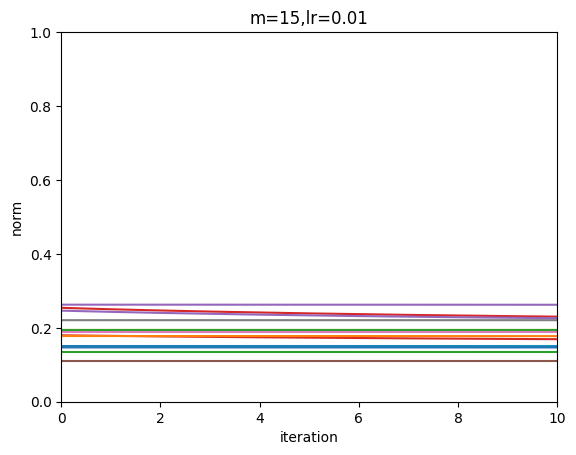

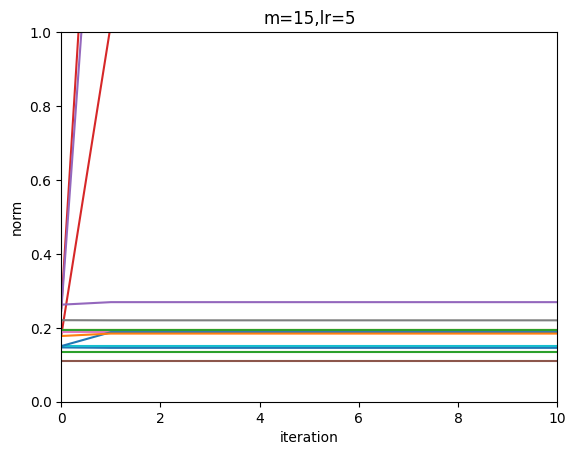

loss_1:4.589103627949953e-05
loss_2:0.0


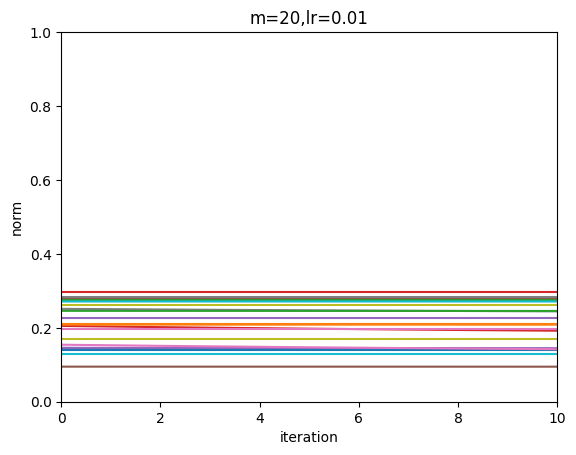

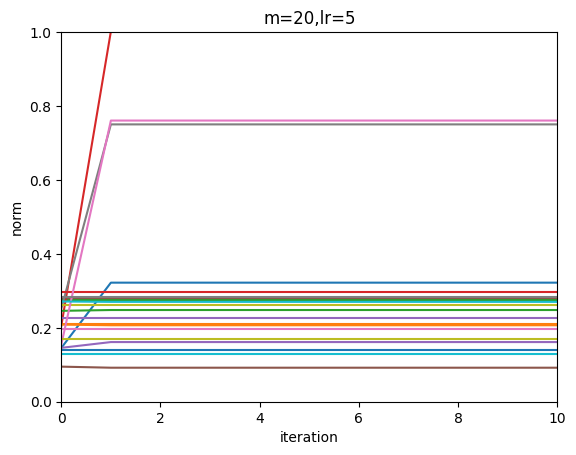

loss_1:7.475299935322255e-05
loss_2:0.0


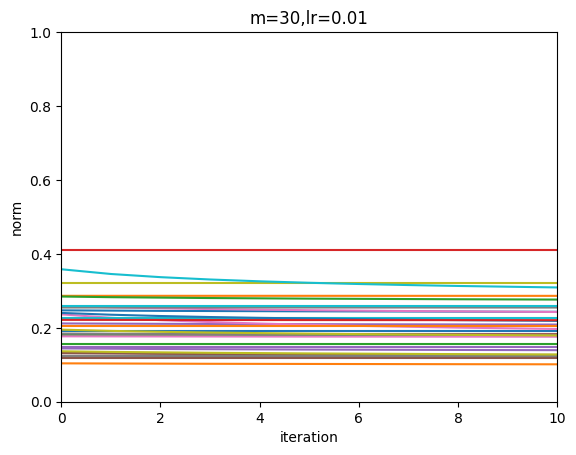

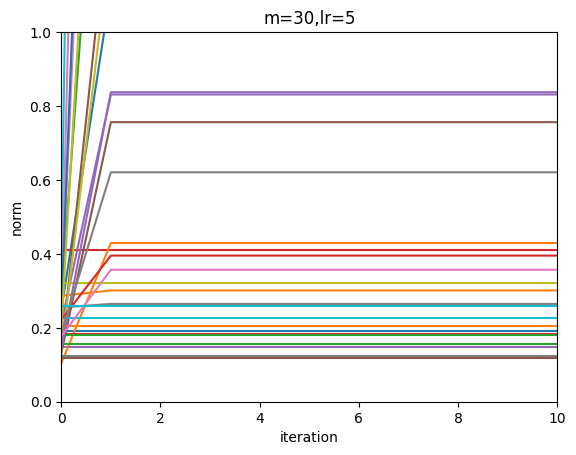

loss_1:6.367316382238641e-05
loss_2:6.366281200126389e-12


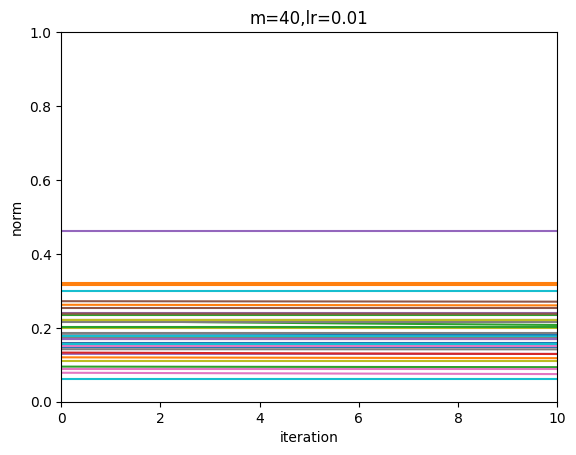

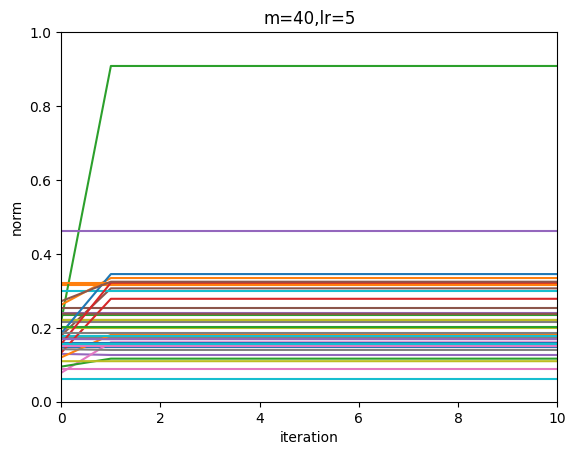

loss_1:7.570548041258007e-05
loss_2:3.395458624010951e-14


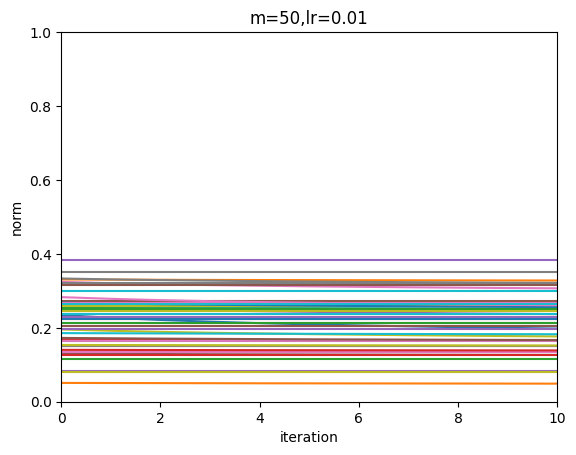

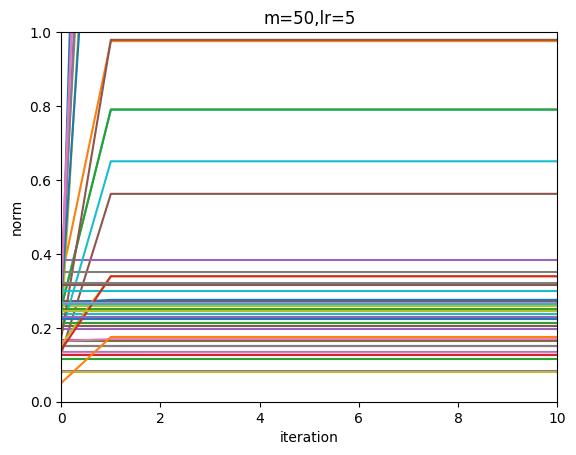

loss_1:8.826507109915838e-05
loss_2:9.421320890996192e-16


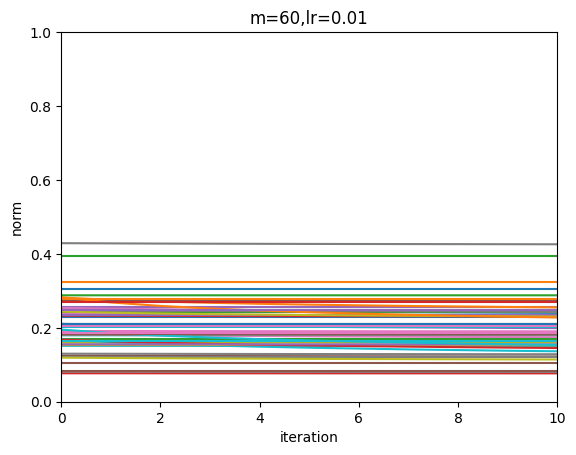

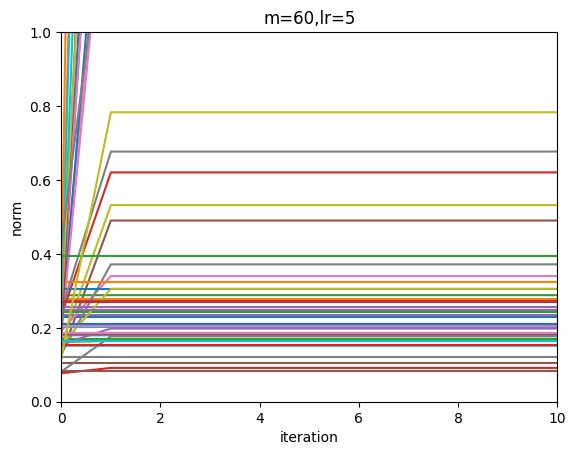

In [43]:
# experiment 1
itr=1000
learning_rate_1=0.01 # small
learning_rate_2=5  # large
m_list=[15, 20, 30, 40, 50, 60]
loss_data_1=np.zeros((len(m_list),itr))
loss_data_2=np.zeros((len(m_list),itr))

for i in range(len(m_list)):
  m=m_list[i]
  # record norm change
  norm_list_1=np.zeros((m,itr))
  norm_list_2=np.zeros((m,itr))

  # model for 2 lr
  model_1 = torch.nn.Sequential(
    torch.nn.Linear(D_in,m,bias=False), # w matrix
    MyReLU(),
    torch.nn.Linear(m,D_out,bias=False), # v matrix
  )
  torch.nn.init.normal_(model_1[0].weight, 0, 0.1) # initialize w
  weight_mat1=torch.Tensor(m, D_in).normal_(0, 0.1)
  model_1[0].weight.data=nn.Parameter(weight_mat1)
  torch.nn.init.constant_(model_1[2].weight, 1) # initialize v

  model_2 = torch.nn.Sequential(
    torch.nn.Linear(D_in,m,bias=False), # w matrix
    MyReLU(),
    torch.nn.Linear(m,D_out,bias=False), # v matrix
  )
  torch.nn.init.normal_(model_2[0].weight, 0, 0.1)
  weight_mat2=weight_mat1.clone()
  model_2[0].weight.data=nn.Parameter(weight_mat2)
  torch.nn.init.constant_(model_2[2].weight, 1)

  # sum up all students
  loss_fn = nn.MSELoss(reduce='sum')

  # begin training
  for it in range(itr):
      #forword pass
      y_hat_1=model_1(x)
      y_hat_2=model_2(x)

      #compute loss
      loss_1 = loss_fn(y_hat_1, y)
      loss_2 = loss_fn(y_hat_2, y)

      # record loss
      loss_data_1[i][it]=loss_1.item()
      loss_data_2[i][it]=loss_2.item()

      # record norm
      for j in range(m):
        norm_list_1[j][it]=model_1[0].weight[j].norm().item()
        norm_list_2[j][it]=model_2[0].weight[j].norm().item()

      # backward propagate
      loss_1.backward()
      loss_2.backward()

      # update student
      with torch.no_grad():
        for param in model_1.parameters():
          param -= learning_rate_1 * param.grad
          break # only update w
        for param in model_2.parameters():
          param -= learning_rate_2 * param.grad
          break # only update w
      model_1.zero_grad()
      model_2.zero_grad()

  # print final loss
  print('loss_1:{0}'.format(loss_1))
  print('loss_2:{0}'.format(loss_2))

  # plot norm change
  fig,ax = plt.subplots()
  for i in range(m):
    ax.plot(norm_list_1[i])
  ax.set_xlabel('iteration')
  ax.set_ylabel('norm')
  plt.xlim(0,10)
  plt.ylim(0,1)
  plt.title('m={0},lr={1}'.format(m,learning_rate_1))
  plt.show()

  fig,ax = plt.subplots()
  for i in range(m):
    ax.plot(norm_list_2[i])
  ax.set_xlabel('iteration')
  ax.set_ylabel('norm')
  plt.xlim(0,10)
  plt.ylim(0,1)
  plt.title('m={0},lr={1}'.format(m,learning_rate_2))
  plt.show()

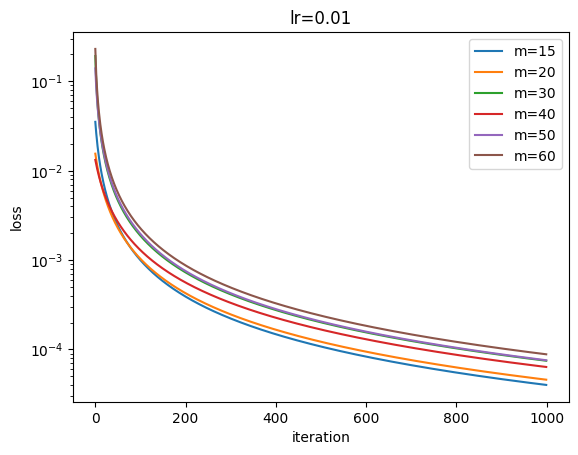

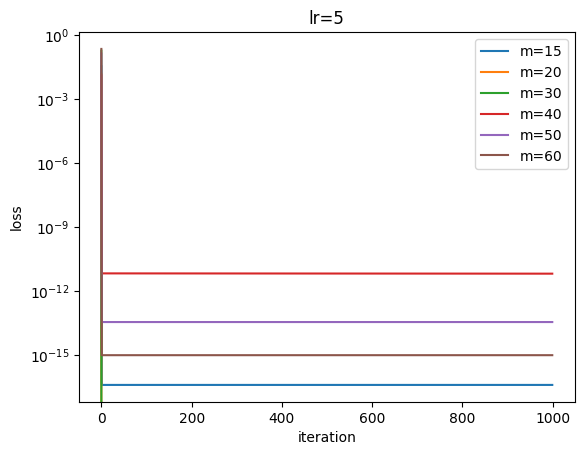

In [44]:
# plot loss change
fig,ax = plt.subplots()
plt.yscale('log')
for i in range(len(m_list)):
  ax.plot(loss_data_1[i],label='m={0}'.format(m_list[i]))
ax.set_xlabel('iteration')
ax.set_ylabel('loss')
ax.legend()
plt.title('lr={0}'.format(learning_rate_1))
plt.show()

fig,ax = plt.subplots()
plt.yscale('log')
for i in range(len(m_list)):
  ax.plot(loss_data_2[i],label='m={0}'.format(m_list[i]))
ax.set_xlabel('iteration')
ax.set_ylabel('loss')
ax.legend()
plt.title('lr={0}'.format(learning_rate_2))
plt.show()